In [ ]:
import tensorflow as tf
# from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unzip '/content/drive/MyDrive/ML/archive.zip'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  /content/drive/MyDrive/ML/archive.zip
replace UTKFace/100_0_0_20170112213500903.jpg.chip.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
BASE_DIR = '/content/UTKFace'
age_labels = []
gender_labels = []
image_paths = []

image_filenames = os.listdir(BASE_DIR)
random.shuffle(image_filenames)

for image in tqdm(image_filenames):
  image_path = os.path.join(BASE_DIR, image)
  img_components = image.split('_')
  # age_label = int(img_components[0])
  gender_label = int(img_components[1])

  # Append the image_path, age_label, and gender_label
  # age_labels.append(age_label)
  gender_labels.append(gender_label)
  image_paths.append(image_path)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [ ]:
print(f'Number of age_labels: {len(age_labels)}, Number of gender_labels: {len(gender_labels)}, Number of image_paths: {len(image_paths)}')

Number of age_labels: 0, Number of gender_labels: 23708, Number of image_paths: 23708


In [ ]:
gender_mapping = {
    1: 'Female',
    0: 'Male'
}

In [ ]:
import pandas as pd
df = pd.DataFrame()
df['image_path'],df['gender'] = image_paths, gender_labels
df.head(5)

,image_path,gender
0,/content/UTKFace/32_1_3_20170109134532682.jpg....,1
1,/content/UTKFace/30_0_0_20170117120207461.jpg....,0
2,/content/UTKFace/2_1_2_20161219161900526.jpg.c...,1
3,/content/UTKFace/32_1_4_20170105165021555.jpg....,1
4,/content/UTKFace/48_0_1_20170117173143196.jpg....,0


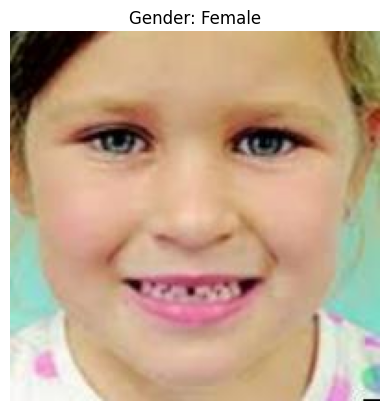

In [ ]:
from PIL import Image

rand_index = random.randint(0, len(image_paths))
# age = df['age'][rand_index]
gender = df['gender'][rand_index]
IMG = Image.open(df['image_path'][rand_index])
plt.title(f' Gender: {gender_mapping[gender]}')
plt.axis('off')
plt.imshow(IMG)

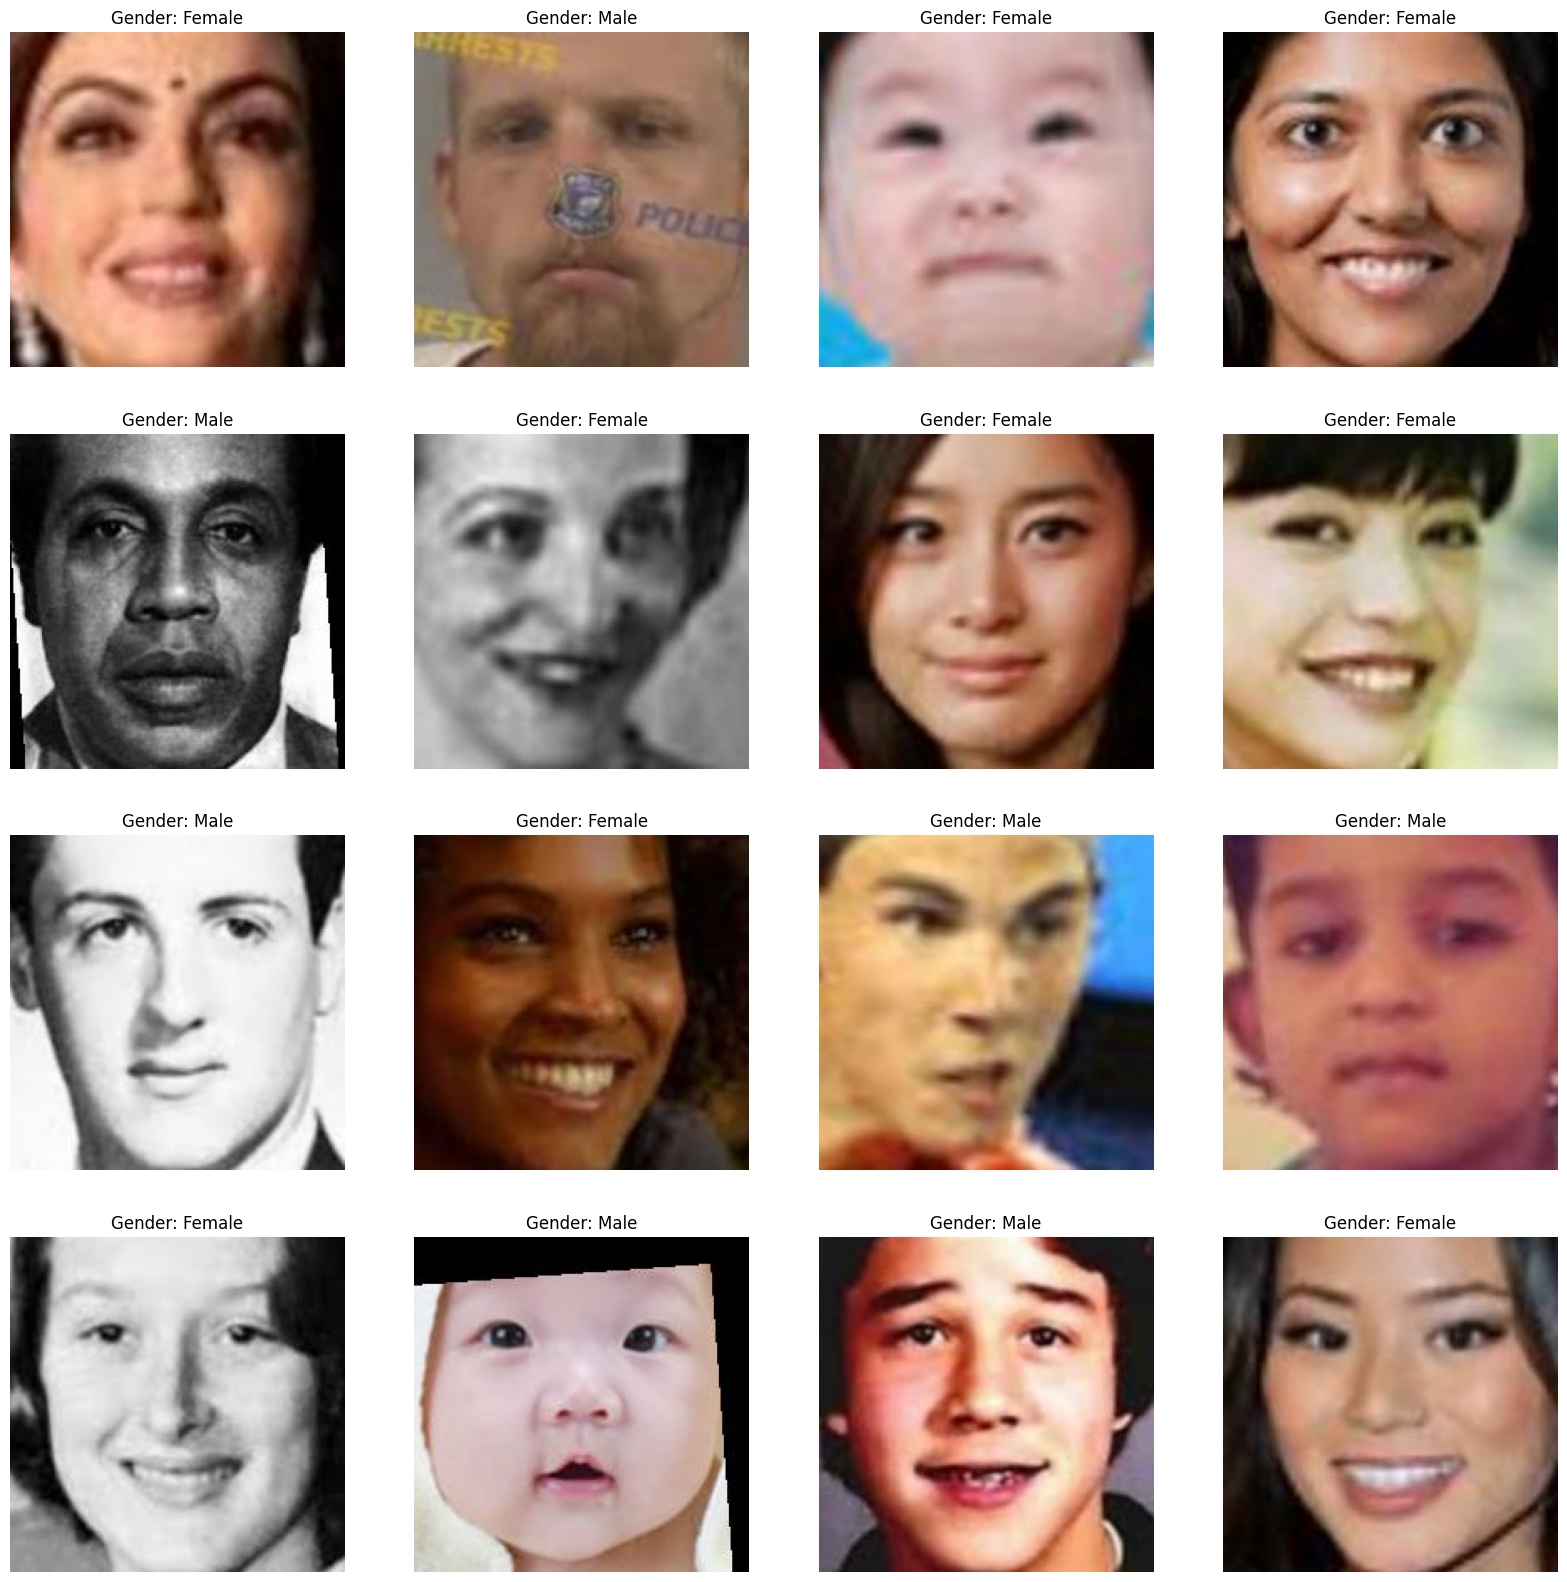

In [ ]:
plt.figure(figsize=(20, 20))
samples = df.iloc[0:16]

for index, sample,gender in samples.itertuples():
    plt.subplot(4, 4, index + 1)
    img = tf.keras.utils.load_img(sample)
    img = np.array(img)
    plt.axis('off')
    plt.title(f'Gender: {gender_mapping[gender]}')
    plt.imshow(img)

In [ ]:
def extract_image_features(images):
    features = list()

    for image in tqdm(images):
        img = tf.keras.utils.load_img(image, color_mode="grayscale")
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [ ]:
X = extract_image_features(df['image_path'])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [ ]:
X = X / 255.0

In [ ]:
y_gender = np.array(df['gender'])

In [ ]:
input_shape = (128, 128, 1)

In [ ]:
inputs = Input((input_shape))
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
max_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(max_1)
max_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(max_2)
max_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)

flatten = Flatten()(max_3)

# fully connected layers
dense_1 = Dense(256, activation='relu')(flatten)
# dense_2 = Dense(256, activation='relu')(flatten)

dropout_1 = Dropout(0.3)(dense_1)
# dropout_2 = Dropout(0.3)(dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out')(dropout_1)
# output_2 = Dense(1, activation='relu', name='age_out')(dropout_2)

model = Model(inputs=[inputs], outputs=[output_1])

model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x=X, y=y_gender,
                    batch_size=32, epochs=15, validation_split=0.2)
model.save("mymodel.h5")

Epoch 1/15
593/593 ━━━━━━━━━━━━━━━━━━━━ 642s 1s/step - accuracy: 0.7233 - loss: 0.5338 - val_accuracy: 0.8545 - val_loss: 0.3258
Epoch 2/15
593/593 ━━━━━━━━━━━━━━━━━━━━ 675s 1s/step - accuracy: 0.8587 - loss: 0.3215 - val_accuracy: 0.8633 - val_loss: 0.2993
Epoch 3/15
593/593 ━━━━━━━━━━━━━━━━━━━━ 631s 1s/step - accuracy: 0.8833 - loss: 0.2745 - val_accuracy: 0.8840 - val_loss: 0.2649
Epoch 4/15
593/593 ━━━━━━━━━━━━━━━━━━━━ 677s 1s/step - accuracy: 0.8940 - loss: 0.2477 - val_accuracy: 0.8971 - val_loss: 0.2430
Epoch 5/15
593/593 ━━━━━━━━━━━━━━━━━━━━ 730s 1s/step - accuracy: 0.9076 - loss: 0.2280 - val_accuracy: 0.8817 - val_loss: 0.2821
Epoch 6/15
593/593 ━━━━━━━━━━━━━━━━━━━━ 635s 1s/step - accuracy: 0.9179 - loss: 0.1938 - val_accuracy: 0.8939 - val_loss: 0.2463
Epoch 7/15
593/593 ━━━━━━━━━━━━━━━━━━━━ 726s 1s/step - accuracy: 0.9317 - loss: 0.1720 - val_accuracy: 0.9003 - val_loss: 0.2514
Epoch 8/15
593/593 ━━━━━━━━━━━━━━━━━━━━ 653s 1s/step - accuracy: 0.9430 - loss: 0.1497 - val_accu